# Task 4

### Instruction

The goal of this subtask is to develop your own model and use it to learn the sine function on the interval $[0, 2π]$. Discretize the interval with a suitable number of points (of your choice) and use the values of the sine function at these discretization points as labels. Implement a Quantum Machine Learning model which reproduces the values of the sine function.



#### Importing necessary Libraries

In [5]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


#### Quantum Device Initialization: define a quantum device using PennyLane's default.qubit simulator with a single qubit. This is where the quantum circuit will be executed.

In [6]:
num_qubits = 1
dev = qml.device('default.qubit', wires=num_qubits)


#### Quantum Circuit Design

#### Input Encoding (qml.RX): 
The input value x is encoded into the quantum state using a rotation around the X-axis.
#### Parameterized Rotation (qml.Rot): 
The circuit includes a parameterized rotation gate that is controlled by three parameters. These parameters will be optimized during training.
#### Measurement (qml.expval): 
The circuit measures the expectation value of the Pauli-Z operator on the qubit, which serves as the model's prediction.

In [7]:
@qml.qnode(dev)
def circuit(params, x):
    qml.RX(x, wires=0)
    qml.Rot(params[0], params[1], params[2], wires=0)
    return qml.expval(qml.PauliZ(0))


#### A  function around the quantum circuit that takes input x and the current circuit parameters params, returning the model's prediction.

In [8]:
def model(x, params):
    return circuit(params, x)


#### The mean squared error (MSE) between the predicted values and the true sine values is calculated as the cost function. This function measures how well the model's predictions align with the actual sine values and is used for optimization.

In [9]:
def cost(params, x, y):
    pred = np.array([model(xi, params) for xi in x])
    return np.mean((pred - y) ** 2)


#### Parameter Initialization: The three parameters for the rotation gate in the quantum circuit are initialized randomly.
#### Data Preparation: 
The x_values represent the input data, evenly spaced over the interval $[0,2π]$. The corresponding y_values are the sine function values at these points, serving as the true labels for training.

In [10]:
params = np.random.random(3)
x_values = np.linspace(0, 2 * np.pi, 100)
y_values = np.sin(x_values)


#### Gradient Descent Optimizer is used to optimize the circuit parameters by minimizing the cost function.
Training the model. In each epoch, the parameters are updated using the gradient of the cost function with respect to the parameters.


In [11]:
opt = qml.GradientDescentOptimizer(stepsize=0.1)

epochs = 100
for i in range(epochs):
    params = opt.step(lambda p: cost(p, x_values, y_values), params)
    if i % 10 == 0: # Print Loss per 10 epochs
        loss = cost(params, x_values, y_values)
        print(f"Epoch {i} Loss {loss:.4f}")


Epoch 0 Loss 0.9967
Epoch 10 Loss 0.4447
Epoch 20 Loss 0.0639
Epoch 30 Loss 0.0136
Epoch 40 Loss 0.0063
Epoch 50 Loss 0.0041
Epoch 60 Loss 0.0030
Epoch 70 Loss 0.0022
Epoch 80 Loss 0.0018
Epoch 90 Loss 0.0014




#### After training, the model is used to predict the sine values for the input x_values.
#### Visualization: The true sine function and the model's predictions are plotted together to visually assess how well the quantum model has learned the sine function.

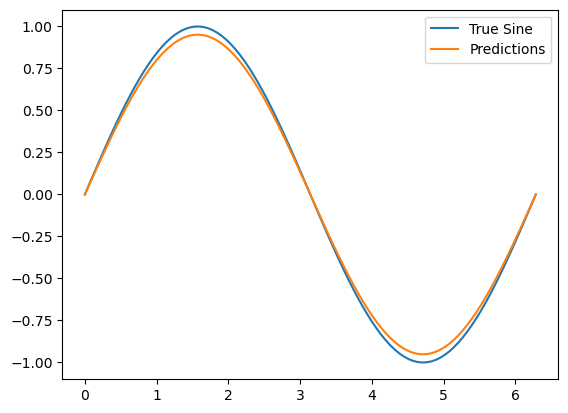

In [12]:
predictions = np.array([model(x, params) for x in x_values])

plt.plot(x_values, y_values, label='True Sine')
plt.plot(x_values, predictions, label='Predictions')
plt.legend()
plt.show()
